# Big Data Mart Sales Problem
# Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

Note: You can find the dataset in the link below.

In [1]:
#IMPORTING THE LIBRARIES NEEDED

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from  sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



import warnings
warnings.filterwarnings('ignore')

In [2]:
#READ THE DATASET


Train_data=pd.read_csv('C:/Users/HP/Desktop/data sets/bigdatamart_Train.csv')
Test_data=pd.read_csv('C:/Users/HP/Desktop/data sets/bigdatamart_Test.csv')


In [3]:
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


We got two dataset in this problem,one is train and another one is test,Train data have got an extra feature Item_outlet sales(Total sales of an outlet),which is the target variable.It is continuous in nature so we can take this problem as a regression problem.

This notebook analyzes customer behavior for that we have BigMarts Sales data collected in 2013 which is bifurcated in train (8523 records & 12 attributes) and test (5681 records & 11 attributes) data set, train data set has both independant and dependant variable(s) given below:

- Item_Identifier: Product ID
- Item_Weight: Weight of Product
- Item_Fat_Content: Fat content of Product- Low/Regular
- Item_Visibility: Parameter to know the visiblity/reach of product
- Item_Type: Category of Product
- Item_MRP: Maximum Retail Price of the Product
- Outlet_Identifier: Store ID
- Outlet_Establishment_Year: The Year in which store is established
- Outlet_Size: Areawise distribution of Stores- Low/Medium/High
- Outlet_Location_Type: Type of city in which outlet is located
- Outlet_Type: Type of outlet - Grocery store or supermarket
- Item_Outlet_Sales: Sale price of product - The dependant variable to be predicted.

In [4]:
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Test data doesnt have the item outlet sales column,and the rest features is same like the Train data but the values are different for both the datasets.

In [5]:
print('Train Data:',Train_data.shape)
print('Train Data:',Test_data.shape)

Train Data: (8523, 12)
Train Data: (5681, 11)


There are 8523 rows and 12 columns in Train data.
There are 5681 rows and 11 columns in Train data.

In [6]:
#Statistical Summary
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


- The highest sales is 13086.964800 and the lowest sales is 33.290.
- The counts are not same that means there are null values in this dataset.
- The mean asnd standard deviation is not close to each others,that means there is skewness in the dataset.
- The inter quartile ranges are not in proper manner because the column have differet variance and ranges.

In [7]:
# Statistical summary
Test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4705.0,12.695633,4.664849,4.555,8.645000,12.500000,16.700000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


- The counts are not same that means there are null values in this dataset.
- The mean asnd standard deviation is not close to each others,that means there is skewness in the dataset.
- The inter quartile ranges are not in proper manner because the column have differet variance and ranges.

In [8]:
Test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

Found out all the column names in thr Test Data.

In [9]:
Train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Found out all the column names in thr Train Data.

In [10]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


- object data type columns-Item_Identifier,Item_Type, Outlet_Identifier ,Outlet_Size,Outlet_Location_Type and Outlet_Type.
- float data type columns-Item_Weight,Item_Visibility and Item_MRP.
- int data type - Outlet_Establishment_Year.

In [11]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- object data type columns-Item_Identifier,Item_Type, Outlet_Identifier ,Outlet_Size,Outlet_Location_Type and Outlet_Type.
- float data type columns-Item_Weight,Item_Visibility,Item_Outlet_Sales and Item_MRP.
- int data type - Outlet_Establishment_Year

In [12]:
Train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- object data type columns-Item_Identifier,Item_Type, Outlet_Identifier ,Outlet_Size,Outlet_Location_Type and Outlet_Type.
- float data type columns-Item_Weight,Item_Visibility,Item_Outlet_Sales and Item_MRP.
- int data type - Outlet_Establishment_Year

In [13]:
Test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

- object data type columns-Item_Identifier,Item_Type, Outlet_Identifier ,Outlet_Size,Outlet_Location_Type and Outlet_Type.
- float data type columns-Item_Weight,Item_Visibility and Item_MRP.
- int data type - Outlet_Establishment_Year.

In [14]:
#CHECKING IS THERE ANY NULL VALUES IN TRAIN DATA

Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Null values -
- Item_Weight - 1463
- Outlet_Size - 2410

In [15]:
#CHECKING IS THERE ANY NULL VALUES IN TEST DATA

Test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

- Null values -
- Item_Weight - 976
- Outlet_Size - 1606

<AxesSubplot:>

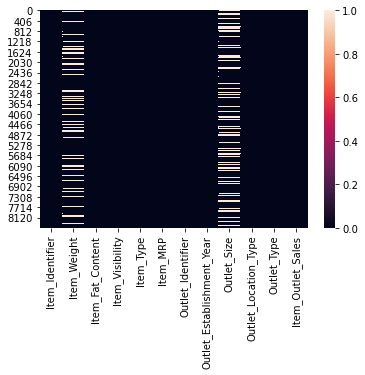

In [16]:
sns.heatmap(Train_data.isnull())

Showing missing values in Item weight and Outlet Size column in Train dataset by heat map.

<AxesSubplot:>

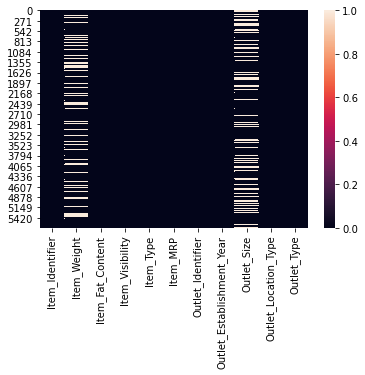

In [17]:
sns.heatmap(Test_data.isnull())

Showing missing values in Item weight and Outlet Size column in Test dataset by heat map.

# Removing Null Values:-

In [18]:
Train_data['Item_Weight'].fillna(Train_data['Item_Weight'].mean(),inplace=True)

In [19]:
Test_data['Item_Weight'].fillna(Test_data['Item_Weight'].mean(),inplace=True)

- using mean for removing Null values because Item Weight column is numerical and continuous in nature.

In [20]:
Train_data["Outlet_Size"].fillna(Train_data["Outlet_Size"].mode()[0],inplace=True)

In [21]:
Test_data["Outlet_Size"].fillna(Test_data["Outlet_Size"].mode()[0],inplace=True)

- using mode for removing Null values because Outlet_Size column is categorical in nature.

In [22]:
Train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- We can see that all null values are filled.

In [23]:
Test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

- We can see that all null values are filled.

# EDA:

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

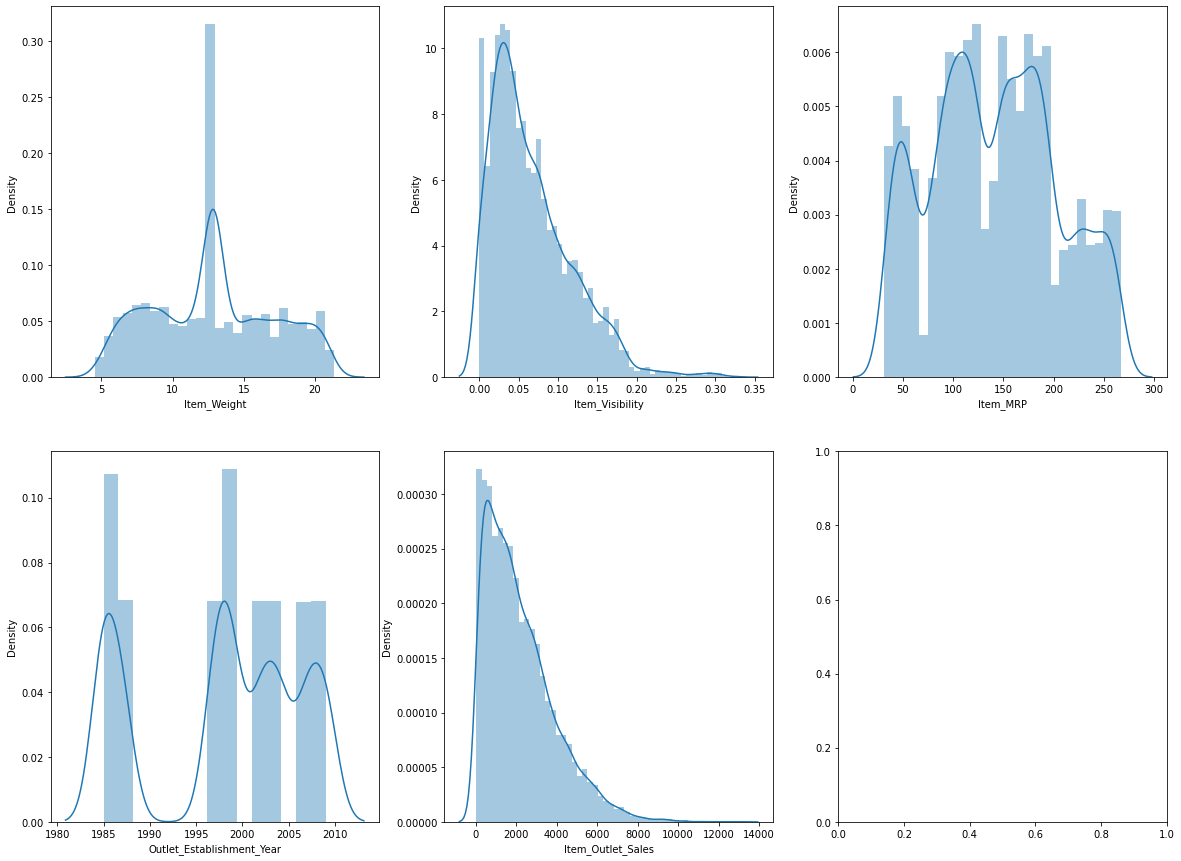

In [24]:
# Checking normal distribution:
fig,ax=plt.subplots(2,3,figsize=(20,15))
sns.distplot(Train_data['Item_Weight'],ax=ax[0,0])
sns.distplot(Train_data['Item_Visibility'],ax=ax[0,1])
sns.distplot(Train_data['Item_MRP'],ax=ax[0,2])
sns.distplot(Train_data['Outlet_Establishment_Year'],ax=ax[1,0])
sns.distplot(Train_data['Item_Outlet_Sales'],ax=ax[1,1])

- We can see that Item weight,Item Mrp and Outlet Establishment year is fairly normally distributed.
- Item outlet sales and Item Visibility  have Right skewness.We will remove the skewness Latter.

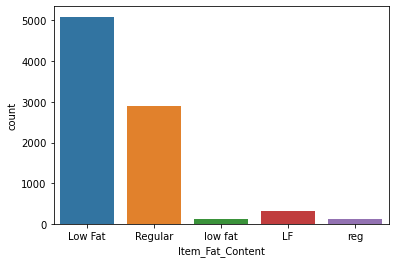

In [25]:
sns.countplot('Item_Fat_Content',data=Train_data)
plt.show()

- we can see that Item_Fat_content consists o five types of data:-
- Low fat
- Regular
- low fat again.
- LF(can be read as low fat)
- reg(Can be read as regular)
- There are three types of low fat,which we can make it one type as Low fat.
- There are two type of Regular,we can make it one type which is Regular.

In [26]:
Train_data['Item_Fat_Content'] =Train_data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

In [27]:
Test_data['Item_Fat_Content'] =Test_data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

Made low fat and Regular type only in Item Fat content.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

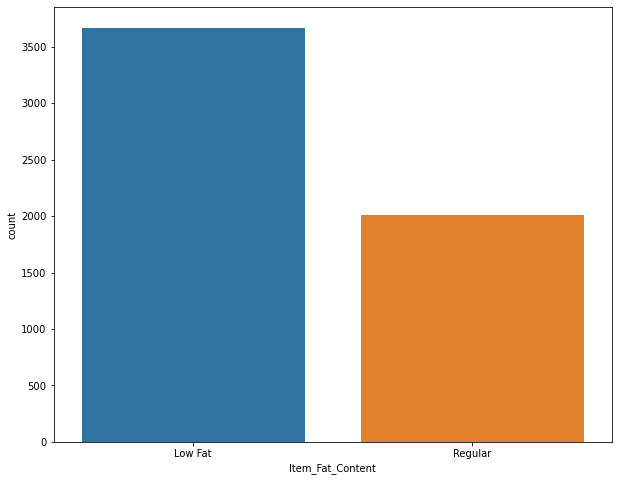

In [28]:
plt.figure(figsize = (10,8))
sns.countplot(Test_data.Item_Fat_Content)

Only two types of data in Item Fat Content:
- Low Fat 
- Regular

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

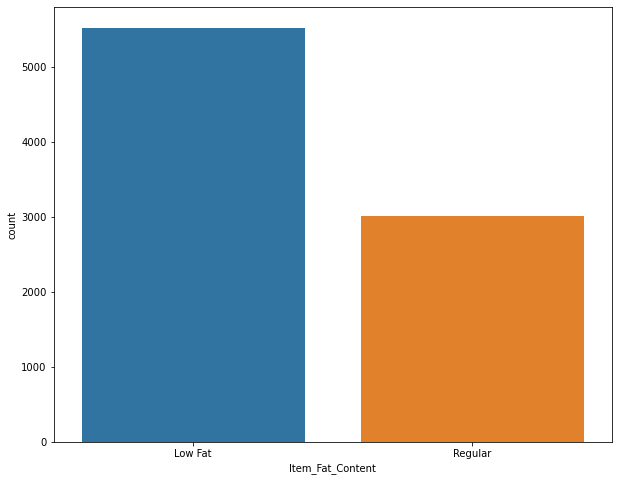

In [29]:
plt.figure(figsize = (10,8))
sns.countplot(Train_data.Item_Fat_Content)

Only two types of data in Item Fat Content:

- Low Fat
- Regular

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

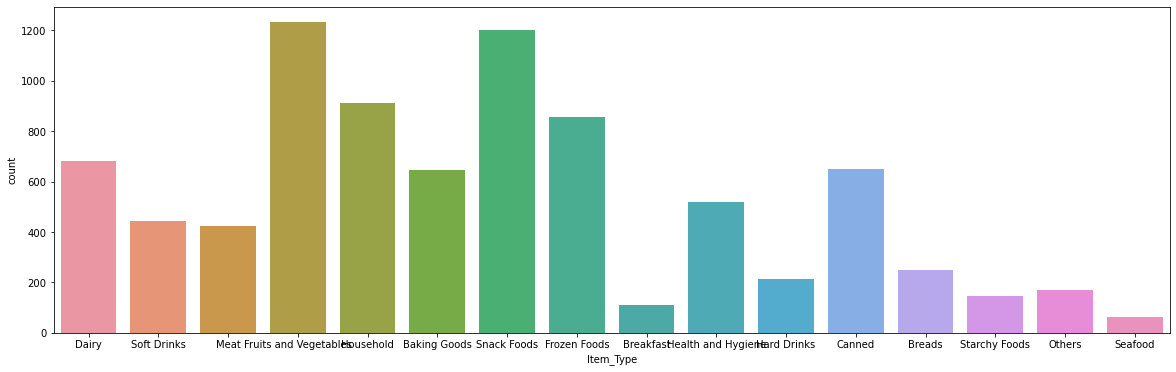

In [30]:
#Checking different type of Item type
plt.figure(figsize = (20,6))
sns.countplot(Train_data.Item_Type)

we can see that there are differnt types of Item type like:-
- Dairy
- Soft Drinks
- Meat 
- Fruits and Vegetables
- Household
- Baking Goods
- Snack Foods
- Frozen Foods
- Breakfast
- Health and Hygiene
- Hard Drinks
- Canned
- Breads
- Starchy Foods
- Others
- Sea Food
Fruits and Vegetables is highest in quantity and Sea food is the lowest in quantity.


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

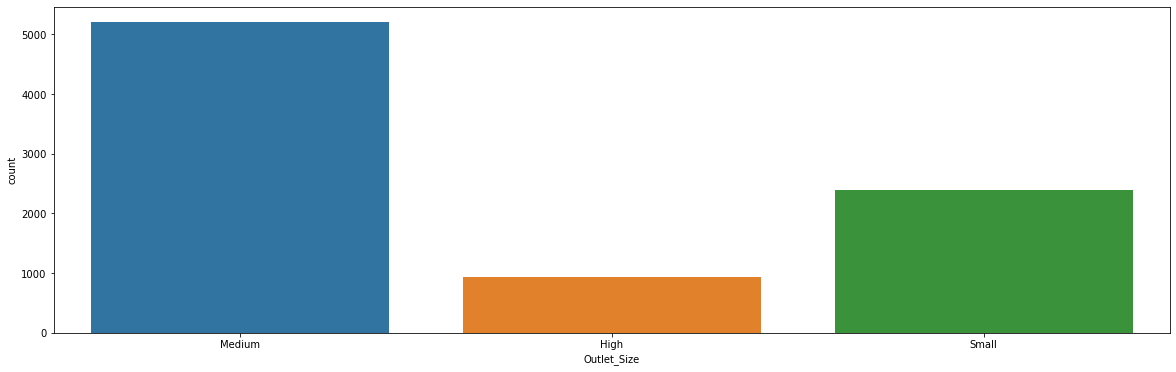

In [31]:
#Checking Outlet size
plt.figure(figsize = (20,6))
sns.countplot(Train_data.Outlet_Size)

There are three types of Outlet size:-
- High
- Medium
- Small

we got Medium size outle is large in number and High size outlet is lowest in number.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

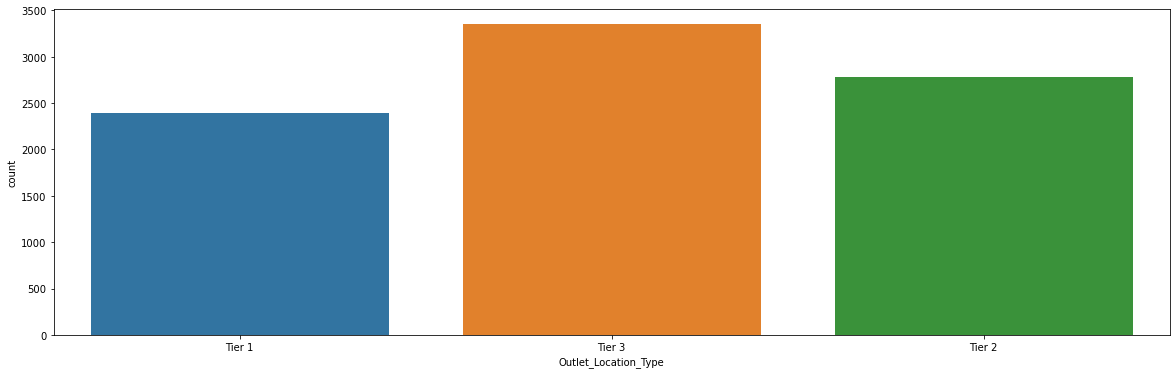

In [32]:
# Outlet Location Type
plt.figure(figsize = (20,6))
sns.countplot(Train_data.Outlet_Location_Type)

The location type is divided into three categories :
- Tier 1 City
- Tier 2 City
- Tier 3 City
we can see that ,tier 3 city is having larger outlets,then Tier 2 and Tier 1 respectively.


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

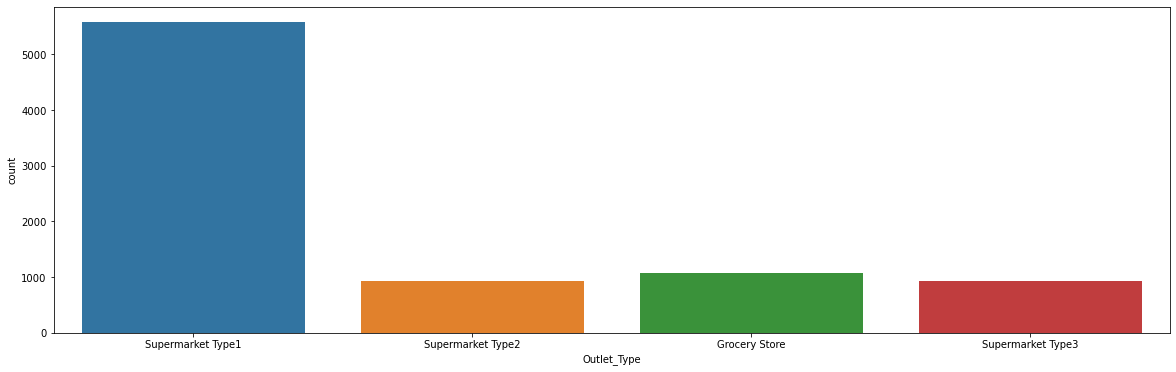

In [33]:
# Checking outlet type
plt.figure(figsize = (20,6))
sns.countplot(Train_data.Outlet_Type)

There are four types of outlets:
- Supermarket Type 1
- Supermarket Type 2
- Supermarket Type 3
- Grocery Store

we can see that the Supermarket Type1 is larger in nos.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

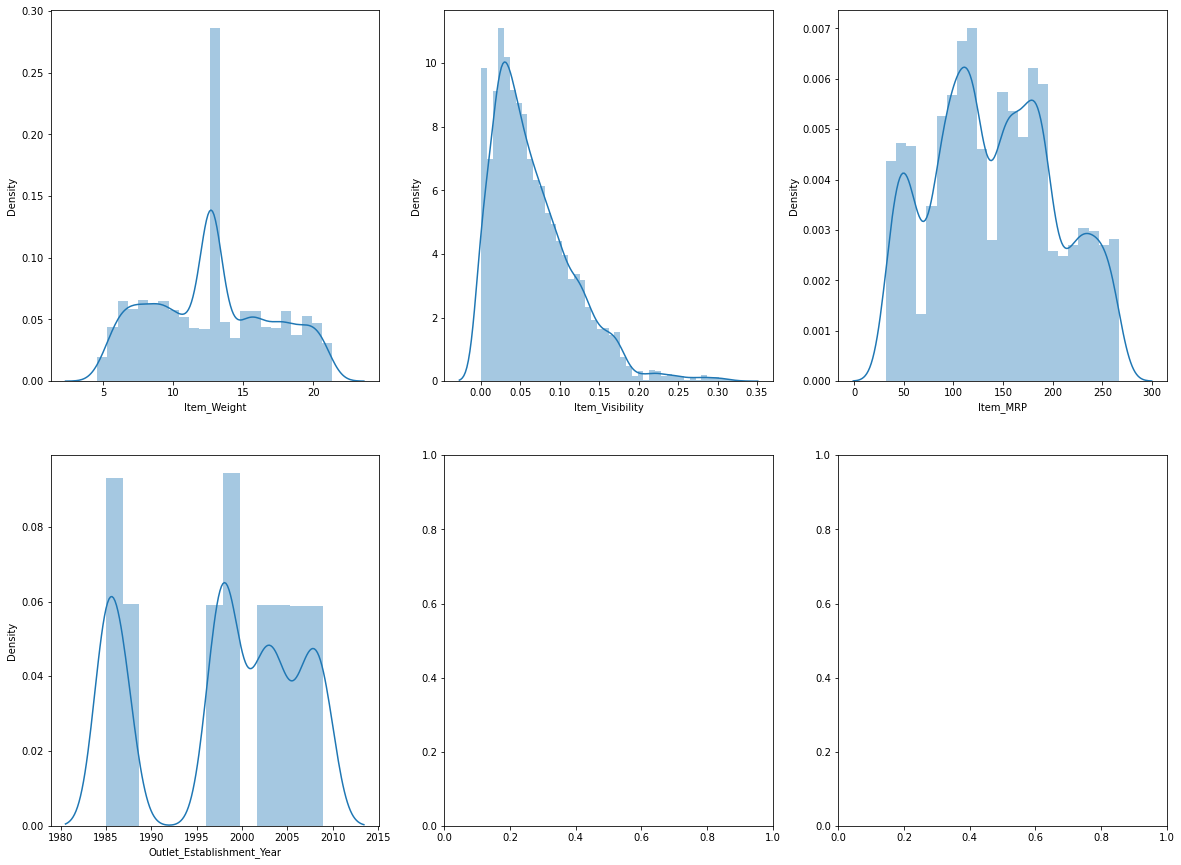

In [34]:
# Checking normal distribution:
fig,ax=plt.subplots(2,3,figsize=(20,15))
sns.distplot(Test_data['Item_Weight'],ax=ax[0,0])
sns.distplot(Test_data['Item_Visibility'],ax=ax[0,1])
sns.distplot(Test_data['Item_MRP'],ax=ax[0,2])
sns.distplot(Test_data['Outlet_Establishment_Year'],ax=ax[1,0])

We can see that Item Weight ,Item Mrp and outlet establishment year is fairly normaly distributed.Item Visibility is having Right Skewness,we will remove it later with some outlier removing techniques.

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

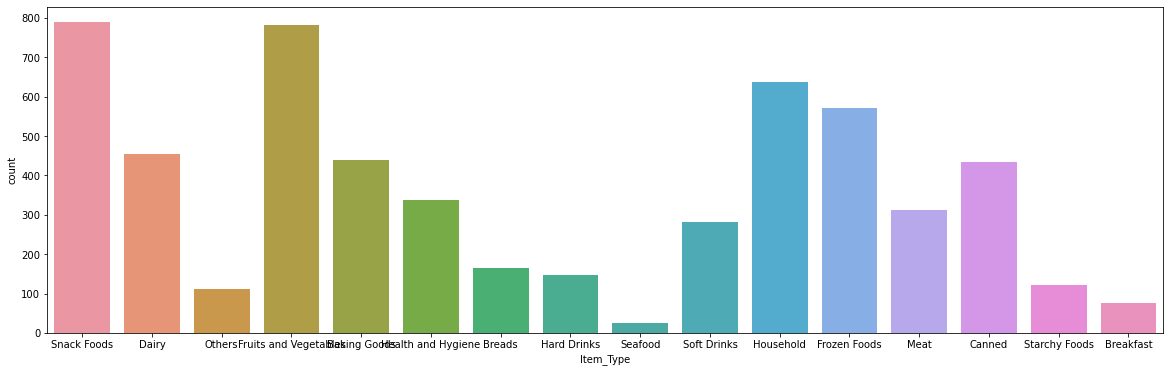

In [35]:
# checking item type of test data
plt.figure(figsize = (20,6))
sns.countplot(Test_data.Item_Type)

we can see that there are differnt types of Item type like:-

- Dairy
- Soft Drinks
- Meat
- Fruits and Vegetables
- Household
- Baking Goods
- Snack Foods
- Frozen Foods
- Breakfast
- Health and Hygiene
- Hard Drinks
- Canned
- Breads
- Starchy Foods
- Others
- Sea Food 
Snack Food is highest in quantity and Sea food is the lowest in quantity.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

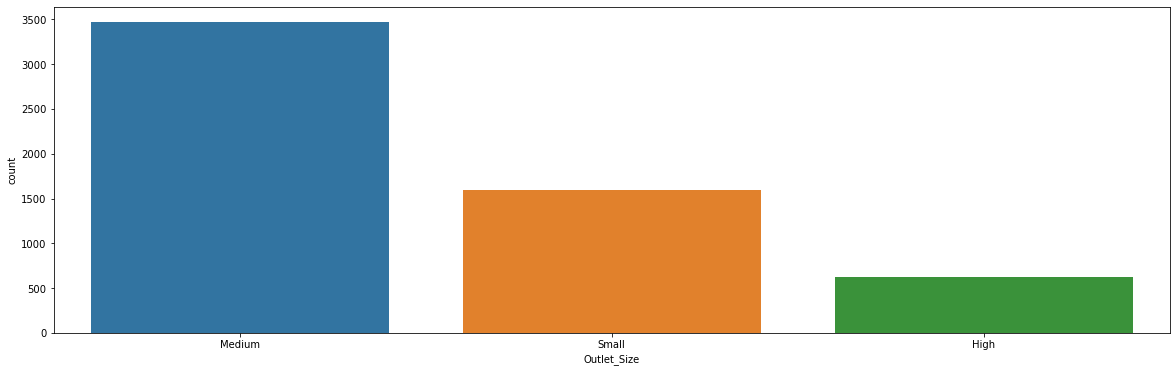

In [36]:
#Checking Outlet size of test data
plt.figure(figsize = (20,6))
sns.countplot(Test_data.Outlet_Size)

There are three types of Outlet size:-

- High
- Medium
- Small
we got Medium size outle is large in number and High size outlet is lowest in number.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

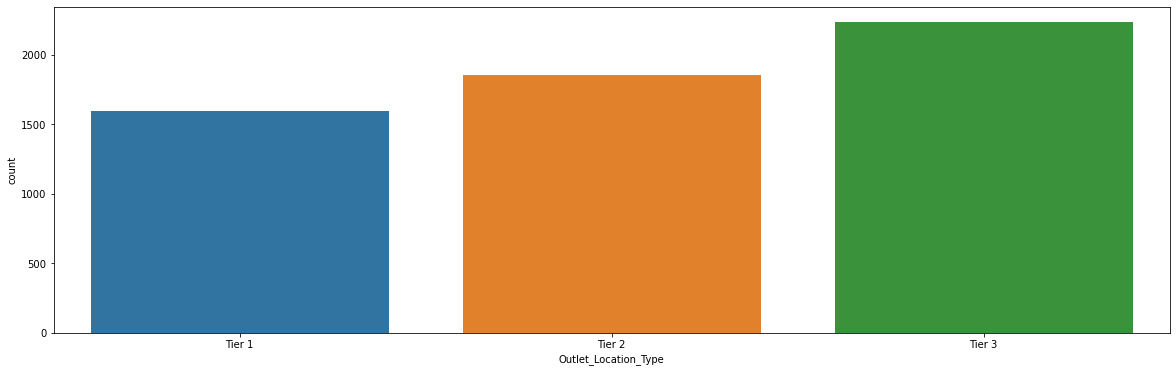

In [37]:
# Outlet Location Type of Test Data
plt.figure(figsize = (20,6))
sns.countplot(Test_data.Outlet_Location_Type)

The location type is divided into three categories :

- Tier 1 City
- Tier 2 City
- Tier 3 City 
we can see that ,tier 3 city is having larger outlets,then Tier 2 and Tier 1 respectively.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

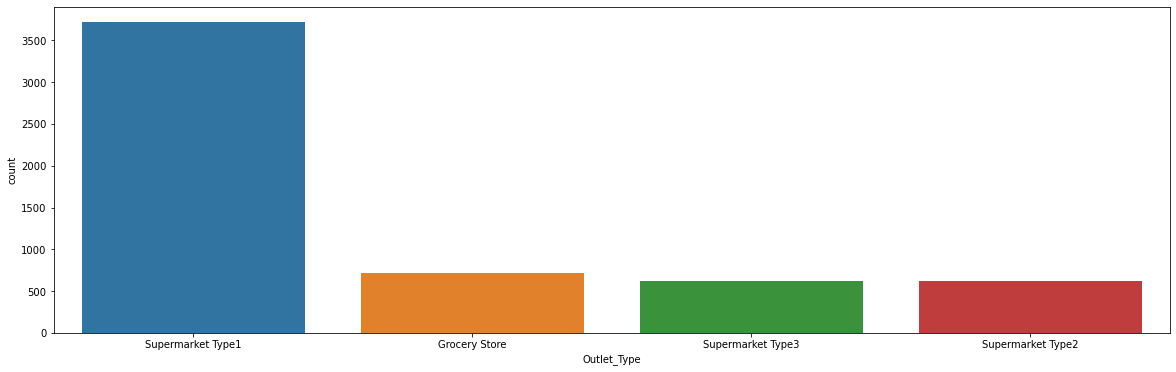

In [38]:
# Checking Outlet type of test data
plt.figure(figsize = (20,6))
sns.countplot(Test_data.Outlet_Type)

There are four types of outlets:

- Supermarket Type 1
- Supermarket Type 2
- Supermarket Type 3
- Grocery Store
we can see that the Supermarket Type1 is larger in nos.

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

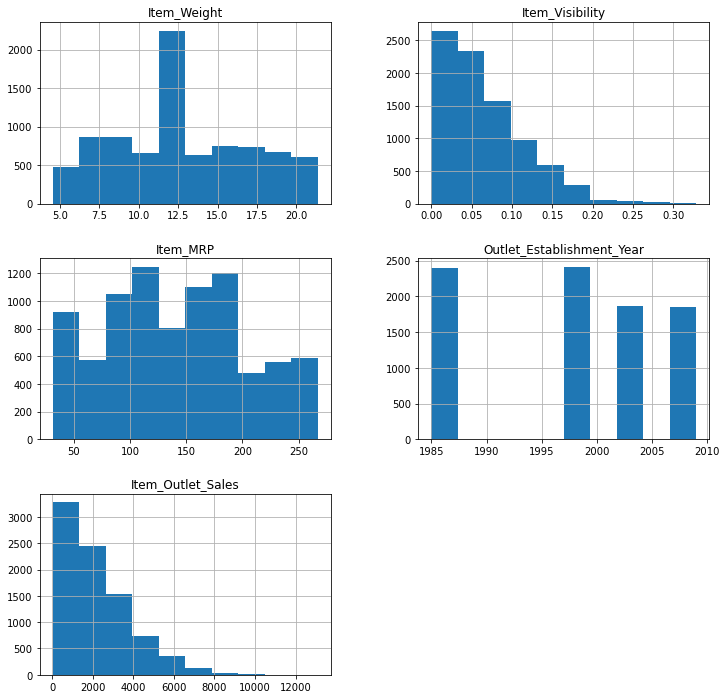

In [39]:
# checking normal distribution of train data
Train_data.hist(figsize=(12,12))

We can see that Item Weight ,Item mrp and outlet establishment year is fairly normaly distributed.Item Visibility and Item outlet sales is having Right Skewness,we will remove it later with some outlier removing techniques.

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>]],
      dtype=object)

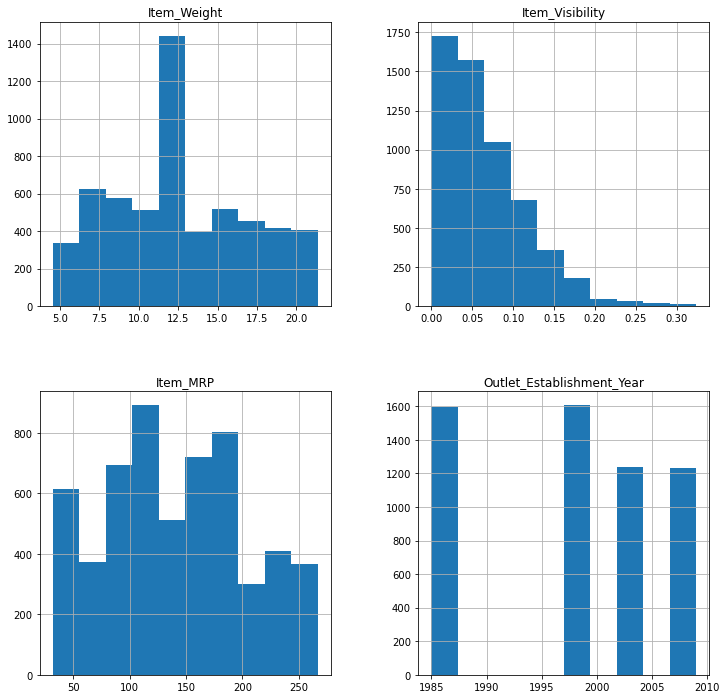

In [40]:
Test_data.hist(figsize=(12,12))

We can see that Item Weight and Item  is fairly normaly distributed.Item Visibility is having Right Skewness,we will remove it later with some outlier removing techniques.

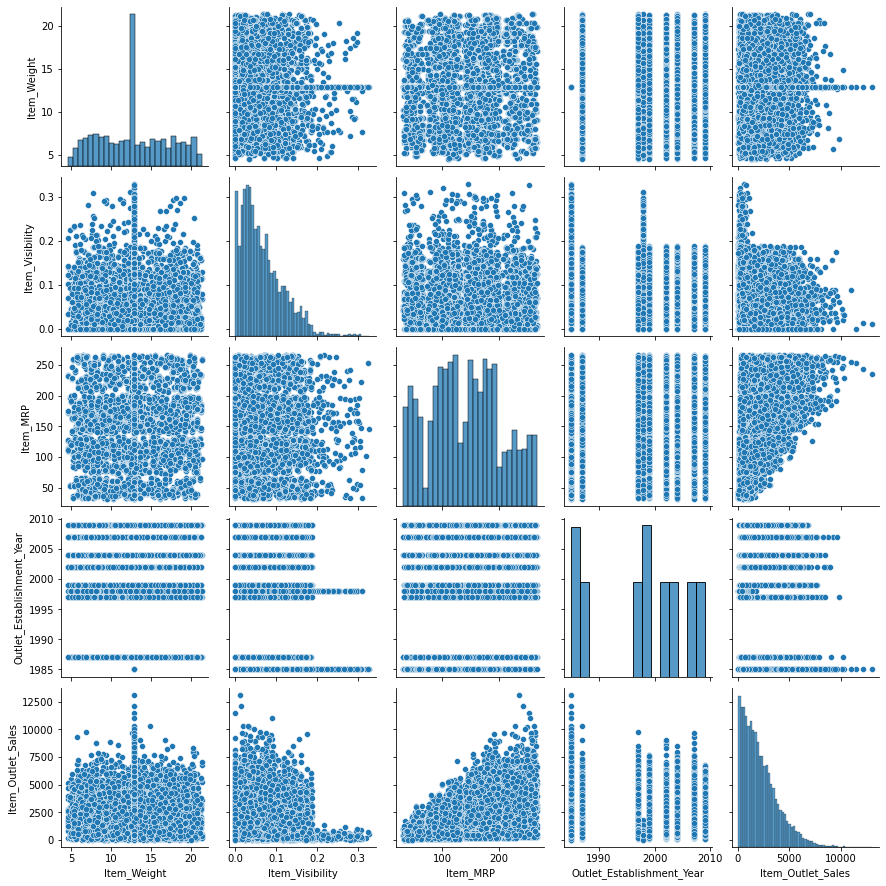

In [41]:
sns.pairplot(Train_data)

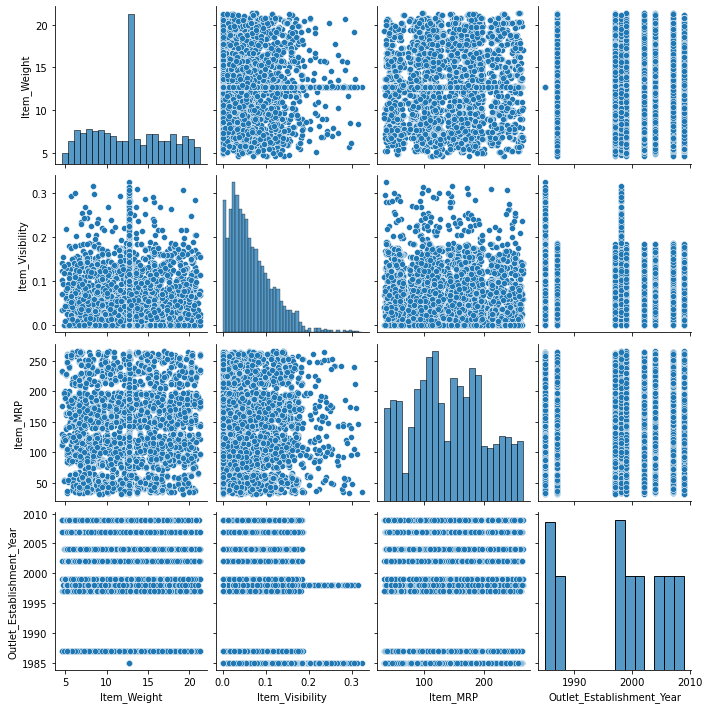

In [42]:
sns.pairplot(Test_data)

# Outlier Detection:

Item_Weight                     AxesSubplot(0.125,0.71587;0.168478x0.16413)
Item_Visibility              AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Item_MRP                     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Outlet_Establishment_Year    AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Item_Outlet_Sales              AxesSubplot(0.125,0.518913;0.168478x0.16413)
dtype: object

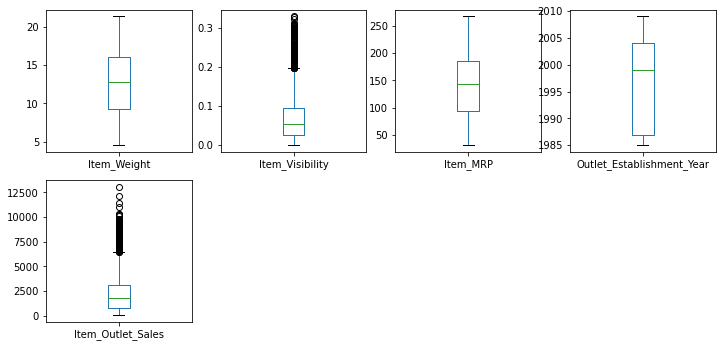

In [43]:
Train_data.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,12))

We can see that,there is outliers in Item visibility nd Item_outlet sales.

In [44]:
Train_data.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

we find ,little skewness in Item_visibility and Item_outlet sales.

In [45]:
Test_data.skew()

Item_Weight                  0.142813
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

we find ,little skew in Item_visibility

In [46]:
Test_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.016380,0.045257,0.013548
Item_Visibility,-0.016380,1.000000,-0.014013,-0.097040
Item_MRP,0.045257,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.013548,-0.097040,-0.007233,1.000000


In [47]:
Train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


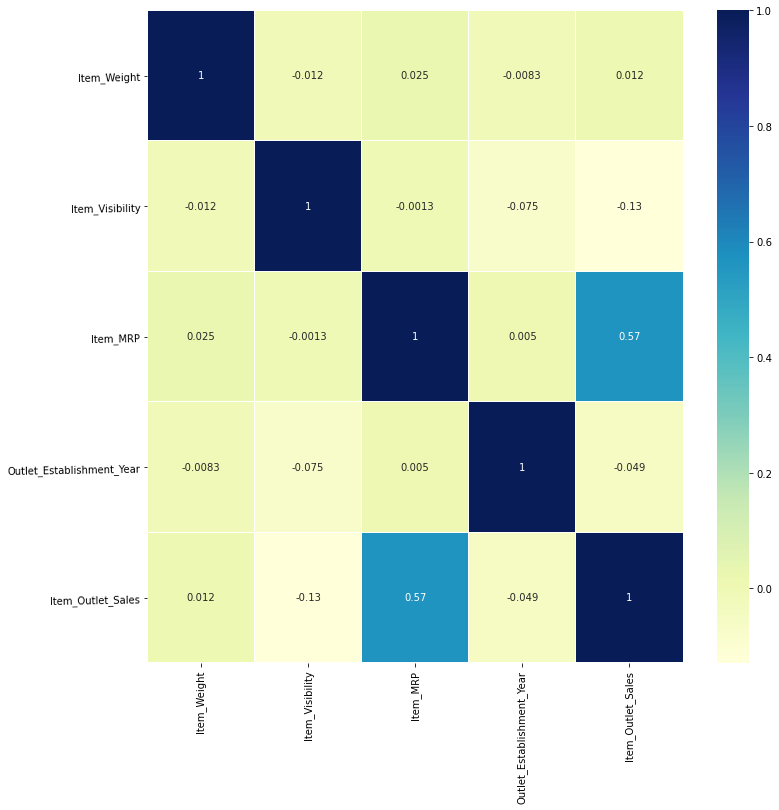

In [48]:
#Checking multicoliniearity of Feature vs Feature and Feature vs Label with Heat map
plt.figure(figsize=(12,12))
sns.heatmap(Train_data.corr(),linewidths=.1,cmap='YlGnBu', annot=True)
plt.yticks(rotation=1);

Each and every features is less co-related to each other.only Item_mrp is sco-related with Item outlet sales.We can drop least co-related columns latter. 

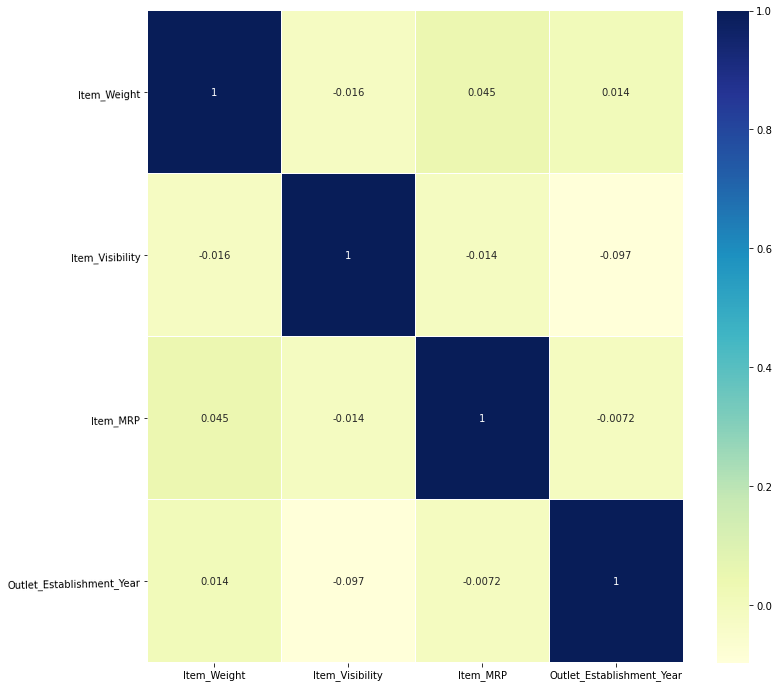

In [49]:
#Checking multicoliniearity of Feature vs Feature and Feature vs Label with Heat map
plt.figure(figsize=(12,12))
sns.heatmap(Test_data.corr(),linewidths=.1,cmap='YlGnBu', annot=True)
plt.yticks(rotation=1);

Each and every features is less co-related to each other.We can drop least co-related columns latter.

In [50]:
Train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [51]:
Test_data['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [52]:
Train_data['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDP25     9
FDX20     9
NCQ06     9
         ..
FDE52     1
FDQ60     1
FDT35     1
FDY43     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [53]:
Test_data['Item_Identifier'].value_counts()

FDK57    8
FDZ50    8
NCS41    8
FDP15    8
DRF48    8
        ..
FDW26    1
FDW49    1
FDQ40    1
FDX45    1
FDG57    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [54]:
# Creting 'new item type' column from Item Identifier column.
Train_data['New_Item_Type'] = Train_data['Item_Identifier'].apply(lambda x: x[0:2])
Train_data['New_Item_Type'] = Train_data['New_Item_Type'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})

In [55]:
Train_data['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

New item Type column consists of three segments:
- Food
- Non-Consumable
- Drinks

In [56]:
# Creting 'new item type' column from Item Identifier column.
Test_data['New_Item_Type'] = Test_data['Item_Identifier'].apply(lambda x: x[0:2])
Test_data['New_Item_Type'] = Test_data['New_Item_Type'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})

In [57]:
Test_data['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

New item Type column consists of three segments:

- Food
- Non-Consumable
- Drinks

In [58]:
Train_data.loc[Train_data['New_Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
Train_data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [59]:
Test_data.loc[Test_data['New_Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
Test_data['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

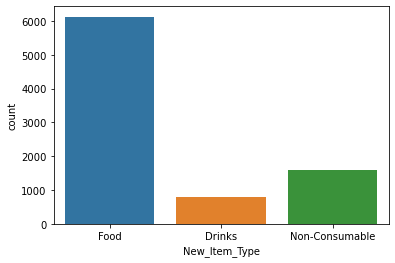

In [60]:
sns.countplot('New_Item_Type',data=Train_data)
plt.show()

In [61]:
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [62]:
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food
2,NCN55,14.600000,Non-Edible,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,Non-Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food


In [65]:
#Encoding all the caategorical data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [66]:
varib = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'New_Item_Type', 'Outlet_Type', 'Outlet_Identifier']
for i in varib:
    Train_data[i] = label.fit_transform(Train_data[i])

In [67]:
Train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,1
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,1
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,0,1998,1,2,0,732.3800,1
4,NCD19,8.93,1,0.000000,Household,53.8614,1,1987,0,2,1,994.7052,2


In [68]:
varib = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'New_Item_Type', 'Outlet_Type', 'Outlet_Identifier']
for i in varib:
    Test_data[i] = label.fit_transform(Test_data[i])

In [69]:
Test_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,9,1999,1,0,1,1
1,FDW14,8.300000,2,0.038428,Dairy,87.3198,2,2007,1,1,1,1
2,NCN55,14.600000,1,0.099575,Others,241.7538,0,1998,1,2,0,2
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,2,2007,1,1,1,1
4,FDY38,12.695633,2,0.118599,Dairy,234.2300,5,1985,1,2,3,1


Item_Weight                      AxesSubplot(0.125,0.71587;0.168478x0.16413)
Item_Fat_Content              AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Item_Visibility               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Item_MRP                      AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Outlet_Identifier               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Outlet_Establishment_Year    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Outlet_Size                  AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Outlet_Location_Type         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Outlet_Type                     AxesSubplot(0.125,0.321957;0.168478x0.16413)
Item_Outlet_Sales            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
New_Item_Type                AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

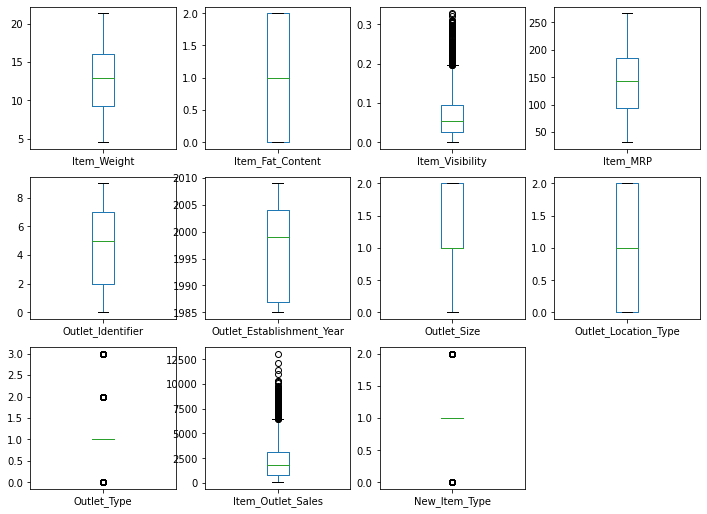

In [144]:
Train_data.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,12))

Item_Weight                      AxesSubplot(0.125,0.71587;0.168478x0.16413)
Item_Fat_Content              AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Item_Visibility               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Item_MRP                      AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Outlet_Identifier               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Outlet_Establishment_Year    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Outlet_Size                  AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Outlet_Location_Type         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Outlet_Type                     AxesSubplot(0.125,0.321957;0.168478x0.16413)
New_Item_Type                AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

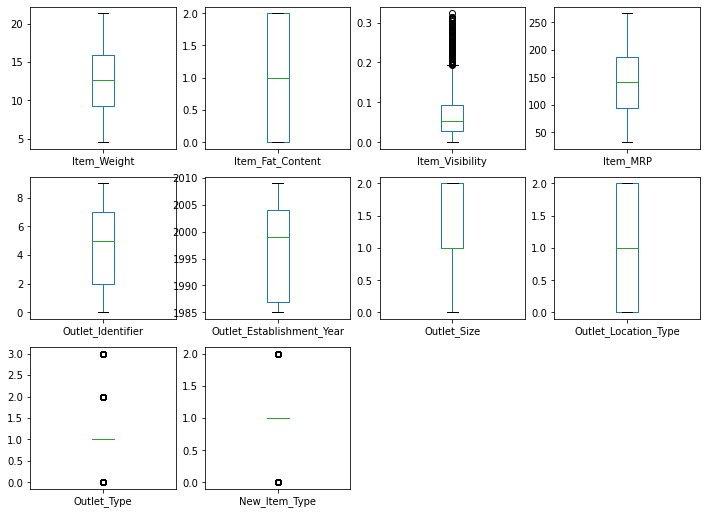

In [145]:
Test_data.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,12))

In [146]:
#Outlier removal with Zscore
zs = zscore(Train_data[['Item_Visibility','Outlet_Type','New_Item_Type','Item_Outlet_Sales']]) #converting data into standard normal distribution
abs_z_score=np.abs(zs)

ae=(abs_z_score<2).all(axis=1)

Train_data=Train_data[ae]
Train_data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
count,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000
mean,12.928038,0.973659,0.060870,139.502131,4.734543,1999.583912,1.184227,1.008360,1.002366,1908.776349,1.211830
std,4.519778,0.887469,0.042966,61.018941,2.995612,7.417404,0.634600,0.791834,0.501609,1337.607406,0.408637
min,4.555000,0.000000,0.000000,31.955800,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000,1.000000
25%,9.000000,0.000000,0.026645,94.046200,2.000000,1997.000000,1.000000,0.000000,1.000000,788.307200,1.000000
50%,12.857645,1.000000,0.052148,140.099600,4.000000,2000.500000,1.000000,1.000000,1.000000,1664.167100,1.000000
75%,16.700000,2.000000,0.089978,183.837100,7.000000,2007.000000,2.000000,2.000000,1.000000,2801.852850,1.000000
max,21.350000,2.000000,0.169139,266.888400,9.000000,2009.000000,2.000000,2.000000,2.000000,5592.720000,2.000000


Item_Weight                      AxesSubplot(0.125,0.71587;0.168478x0.16413)
Item_Fat_Content              AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Item_Visibility               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Item_MRP                      AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Outlet_Identifier               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Outlet_Establishment_Year    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Outlet_Size                  AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Outlet_Location_Type         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Outlet_Type                     AxesSubplot(0.125,0.321957;0.168478x0.16413)
Item_Outlet_Sales            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
New_Item_Type                AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

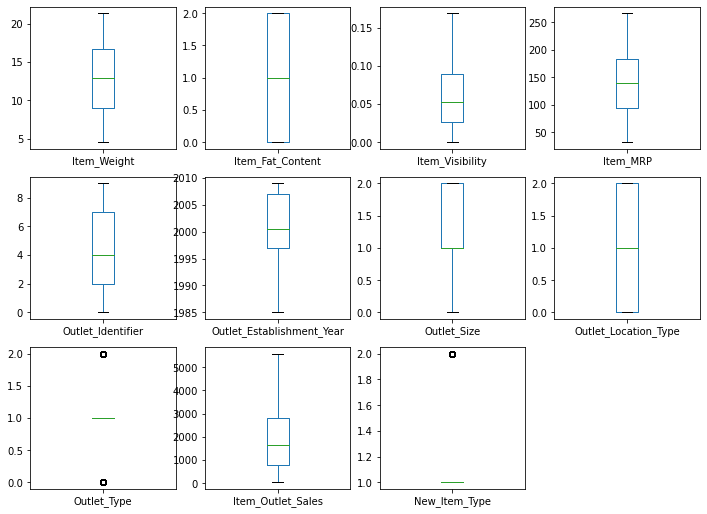

In [147]:
Train_data.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,12))

Outlier is removed mostly.

In [148]:
#Outlier removal with Zscore
zs = zscore(Test_data[['Item_Visibility','Outlet_Type','New_Item_Type',]]) #converting data into standard normal distribution
abs_z_score=np.abs(zs)

ae=(abs_z_score<2).all(axis=1)

Test_data=Test_data[ae]
Test_data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type
count,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000
mean,12.739847,0.971786,0.058944,141.665472,4.770876,1999.610694,1.182253,1.000910,1.004323,1.212287
std,4.556270,0.887185,0.041463,61.474004,2.999176,7.378185,0.633070,0.789669,0.494604,0.408973
min,4.555000,0.000000,0.000000,31.990000,0.000000,1985.000000,0.000000,0.000000,0.000000,1.000000
25%,8.895000,0.000000,0.026294,95.593600,2.000000,1997.000000,1.000000,0.000000,1.000000,1.000000
50%,12.695633,1.000000,0.050340,141.383800,6.000000,2002.000000,1.000000,1.000000,1.000000,1.000000
75%,16.600000,2.000000,0.087289,186.008200,8.000000,2004.000000,2.000000,2.000000,1.000000,1.000000
max,21.350000,2.000000,0.168046,266.588400,9.000000,2009.000000,2.000000,2.000000,2.000000,2.000000


Item_Weight                      AxesSubplot(0.125,0.71587;0.168478x0.16413)
Item_Fat_Content              AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Item_Visibility               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Item_MRP                      AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Outlet_Identifier               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Outlet_Establishment_Year    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Outlet_Size                  AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Outlet_Location_Type         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Outlet_Type                     AxesSubplot(0.125,0.321957;0.168478x0.16413)
New_Item_Type                AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

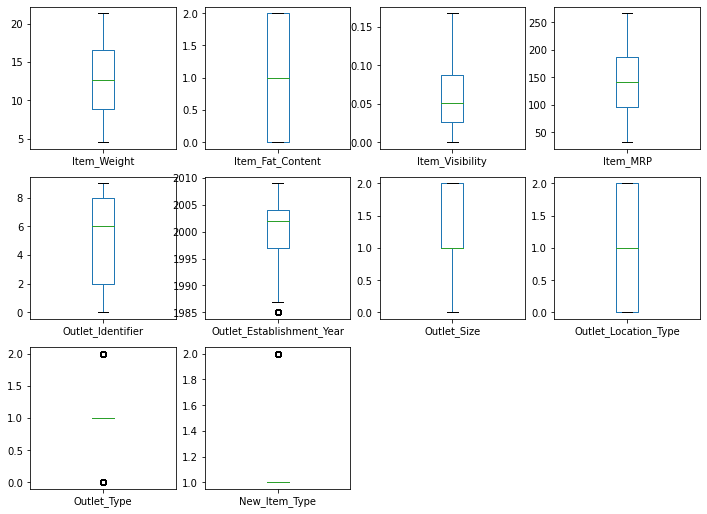

In [149]:
Test_data.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,12))

Outlier is removed mostly.

# Dropping unwanted columns:

In [150]:
Train_data.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier','Item_Visibility'], axis = 1, inplace = True)

In [151]:
Test_data.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier','Item_Visibility'], axis = 1, inplace = True)

In [152]:
Train_data.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,9.300,0,249.8092,1999,1,0,1,3735.1380,1
2,17.500,0,141.6180,1999,1,0,1,2097.2700,1
3,19.200,2,182.0950,1998,1,2,0,732.3800,1
4,8.930,1,53.8614,1987,0,2,1,994.7052,2
5,10.395,2,51.4008,2009,1,2,2,556.6088,1


In [153]:
Test_data.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type
0,20.750,0,107.8622,1999,1,0,1,1
1,8.300,2,87.3198,2007,1,1,1,1
2,14.600,1,241.7538,1998,1,2,0,2
3,7.315,0,155.0340,2007,1,1,1,1
5,9.800,2,117.1492,1997,2,0,1,1


In [154]:
x=Train_data.drop('Item_Outlet_Sales',axis=1)
y=Train_data['Item_Outlet_Sales']

In [155]:
#Standardizaton with StandardScaler()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type
0,9.300,0,249.8092,1999,1,0,1,1
2,17.500,0,141.6180,1999,1,0,1,1
3,19.200,2,182.0950,1998,1,2,0,1
4,8.930,1,53.8614,1987,0,2,1,2
5,10.395,2,51.4008,2009,1,2,2,1
...,...,...,...,...,...,...,...,...
8517,20.750,2,178.8318,1997,2,0,1,1
8518,6.865,0,214.5218,1987,0,2,1,1
8519,8.380,2,108.1570,2002,1,1,1,1
8520,10.600,1,85.1224,2004,2,1,1,2


In [156]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=21)

# Model Creation:

# 1.KNeighbors Regressor:

In [157]:
#Model training
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [158]:
#Prediction with trained data
yknpred = kn.predict(x_train)

In [159]:
print("R Square Score of kn:", metrics.r2_score(y_train,yknpred))

R Square Score of kn: 0.6440274932967004


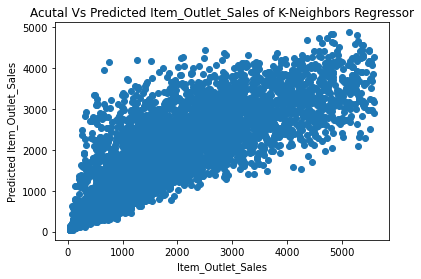

In [160]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yknpred)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Acutal Vs Predicted Item_Outlet_Sales of K-Neighbors Regressor')
plt.show()

In [161]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

In [162]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)

R Square Score of K-Neighbors Regressor: 0.46932553372114805


In [163]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  712.4953054132492


In [164]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  935782.6770965663


In [165]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  967.3586083229767


# 2. XGB Regressor:

In [166]:
#Model Training
xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [167]:
#Prediction with trained data:
yxgpred = xg.predict(x_train)

In [168]:
print("R Square Score of svr:", metrics.r2_score(y_train,yxgpred))

R Square Score of svr: 0.8352423013268777


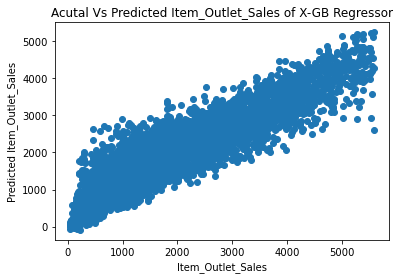

In [169]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yxgpred)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Acutal Vs Predicted Item_Outlet_Sales of X-GB Regressor')
plt.show()

In [170]:
# Predicting test data with model:
y_test_xg_pred = xg.predict(x_test)

In [171]:
xg_accuracy = metrics.r2_score(y_test,y_test_xg_pred)
print("R Square Score of  X-GB Regressor:",xg_accuracy)

R Square Score of  X-GB Regressor: 0.473946056816241


In [172]:
print ('mean absolute error of X-GB Regressor is: ',mean_absolute_error(y_test,y_test_xg_pred))

mean absolute error of X-GB Regressor is:  712.1910953920059


In [173]:
print ('mean squared error of X-GB Regressor is: ',mean_squared_error(y_test,y_test_xg_pred))

mean squared error of X-GB Regressor is:  927634.9222180783


In [174]:
print ('Root mean squared error of X-GB Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_xg_pred)))

Root mean squared error of X-GB Regressor is:  963.1380597910552


# 3.Adaboost Regressor:

In [175]:
#Model Training
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [176]:
#Prediction with trained data:
yabrpred = abr.predict(x_train)

In [177]:
print("R Square Score of AdaBoostRegressor:", metrics.r2_score(y_train,yabrpred))

R Square Score of AdaBoostRegressor: 0.5428324372575619


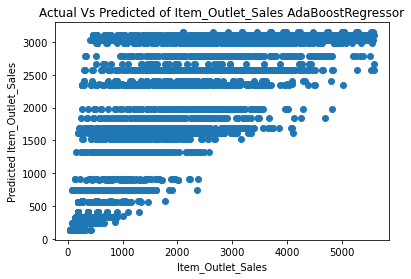

In [178]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yabrpred)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual Vs Predicted of Item_Outlet_Sales AdaBoostRegressor')
plt.show()

In [179]:
# Predicting test data with model:
y_test_abr_pred = abr.predict(x_test)

In [180]:
abr_accuracy = metrics.r2_score(y_test,y_test_abr_pred)
print("R Square Score of AdaBoostRegressor:",abr_accuracy)

R Square Score of AdaBoostRegressor: 0.5491923773172868


In [181]:
print ('mean absolute error of AdaBoostRegressor: ',mean_absolute_error(y_test,y_test_abr_pred))

mean absolute error of AdaBoostRegressor:  657.578761762065


In [182]:
print ('mean squared error of AdaBoostRegressor: ',mean_squared_error(y_test,y_test_abr_pred))

mean squared error of AdaBoostRegressor:  794946.79095394


In [183]:
print ('Root mean squared error of AdaBoostRegressor: ',np.sqrt(mean_squared_error(y_test,y_test_abr_pred)))

Root mean squared error of AdaBoostRegressor:  891.5978863556934


# 4.Linear Regression:

In [184]:
#Model Training
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [185]:
#Prediction with trained data:
ylrpred = lr.predict(x_train)

In [186]:
print("R Square Score of Linear Regression:", metrics.r2_score(y_train,ylrpred))

R Square Score of Linear Regression: 0.43302617103885843


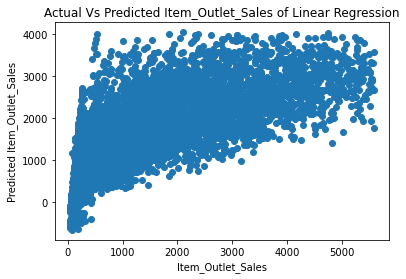

In [187]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,ylrpred)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual Vs Predicted Item_Outlet_Sales of Linear Regression')
plt.show()

In [188]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

In [189]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)

R Square Score of Linear Regression: 0.4329830619781123


In [190]:
print ('mean absolute error of Linear Regression: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of Linear Regression:  773.0792847265917


In [191]:
print ('mean squared error of Linear Regression: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of Linear Regression:  999868.3975543017


In [192]:
print ('Root mean squared error of Linear Regression: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of Linear Regression:  999.9341966121079


# 5.Random Forrest Regressor:

In [193]:
#Model Training:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [194]:
#Model Prediction with trained data:
y_rfr_pred = rfr.predict(x_train)

In [195]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rfr_pred))

R Square Score of Random Forest Regressor: 0.9295717581060109


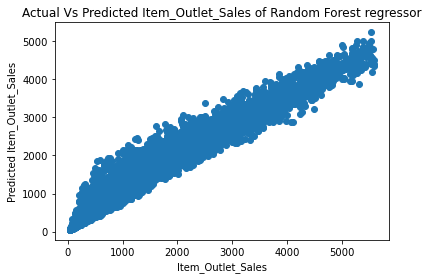

In [196]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rfr_pred)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual Vs Predicted Item_Outlet_Sales of Random Forest regressor')
plt.show()

In [197]:
# Predicting test data with model:
y_test_rfr_pred = rfr.predict(x_test)

In [198]:
rfr_accuracy = metrics.r2_score(y_test,y_test_rfr_pred)
print("R Square Score of Random Forest Regressor:",rfr_accuracy)

R Square Score of Random Forest Regressor: 0.49130643085157644


In [199]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rfr_pred))

mean absolute error of Random Forest Regressor:  696.2932577025808


In [200]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rfr_pred))

mean squared error of Random Forest Regressor is:  897021.9224932198


In [201]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rfr_pred)))

Root mean squared error of Random Forest Regressor is:  947.1124128070647


# Regularization:

In [202]:
#Regularization with Lasso
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [203]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

0.04120036797785013

In [204]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.04120036797785013)

In [205]:
lasso_reg.score(x_test,y_test)

0.43298989478672745

In [206]:
# Regularization with Ridge
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [207]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.001

In [208]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [209]:
ridge_model.score(x_test,y_test)

0.4329830659800006

we got same score from lasso and ridge.

# CROSS VALIDATION SCORE:

In [210]:
#Cv of KNN Regression
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean())

[0.47718196 0.40081953 0.47168712 0.50056777 0.46474882]
mean : 0.4630010390926255


In [211]:
#CV of XGB Regressor
xg_cv_score = cross_val_score(xg,x_train,y_train,cv=5,scoring='r2')
print(xg_cv_score)
print('mean :',xg_cv_score.mean())

[0.48331233 0.40537686 0.48341848 0.45436556 0.45415671]
mean : 0.45612598828226575


In [212]:
#CV of Adaboost Regressor
abr_cv_score = cross_val_score(abr,x_train,y_train,cv=5,scoring='r2')
print(abr_cv_score)
print('mean :',abr_cv_score.mean())

[0.53173317 0.51026887 0.54787296 0.54977901 0.53887572]
mean : 0.5357059466727581


In [213]:
#CV of Linear Regression
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean())

[0.41363635 0.40492142 0.42557061 0.46421561 0.4495183 ]
mean : 0.43157245806644073


In [214]:
#CV of Random forrest regressor
rfr_cv_score = cross_val_score(rfr,x_train,y_train,cv=5,scoring='r2')
print(rfr_cv_score)
print('mean :',rfr_cv_score.mean())

[0.49609237 0.45050472 0.51185813 0.51064456 0.47700454]
mean : 0.4892208647450943


1.KNN Regression-0.487-0.464=0.023
2.XGB Regressor-0.452-0.463=-0.011
3.Adaboost Regressor-0.552-0.535=0.017
4. Linear Regression-0.432-0.432=0
5.Random forrest regressor-0.504-0.498=-0.458

we got best results from Adaboost Regresor model in both r2 score and Cv score,thus choosing it as the best model.

# HYPER PARAMETER TUNING OF ADABOOST REGRESSION MODEL :

In [215]:
grid_param={
   'n_estimators': [50, 100],
   'learning_rate' : [0.01,0.05,0.1,0.3,1],
   'loss' : ['linear', 'square', 'exponential']
             }

In [216]:
grid_search=GridSearchCV(estimator=abr,param_grid=grid_param,cv=10,n_jobs=-1)

In [217]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]})

In [218]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}


In [219]:
abr = AdaBoostRegressor(learning_rate = 0.1,loss='exponential',n_estimators=100)
abr.fit(x_train,y_train)
abr.score(x_test,y_test)

0.5558969952662571

In [220]:
x_test=Test_data

In [221]:
abr.fit(x_train, y_train)
abry_pred = abr.predict(x_test)
score=abr.score(x_train,y_train)
print(score,abr,':')

0.5505841494912891 AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=100) :


In [222]:
# model prediction using AdaBoostRegressor
x_predict = list(abr.predict(x_test))
abr_Bigmartdata = {'predicted_values':x_predict[0:1000],'orignal_values':y_test[0:1000]}
print(pd.DataFrame(abr_Bigmartdata))


      predicted_values  orignal_values
1540       3222.394942        716.4008
2116       3222.394942       3375.6060
1817       3218.464295       4410.2592
2692       3222.394942        129.8310
2536       3222.394942       1018.6740
...                ...             ...
4370       3222.394942       1846.9292
4761       3222.394942       2817.6656
3417       3218.464295        296.9468
1186       3222.394942       1488.0630
1767       3222.394942       3142.5760

[1000 rows x 2 columns]


In [223]:
#import joblib
import joblib

joblib.dump(abr,'abr_bigdatamart_file.obj')

# SAVING THE MODEL

['abr_bigdatamart_file.obj']

In [173]:
abr_from_joblib=joblib.load('abr_bigdatamart_file.obj')
abr_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([3222.20528191, 3222.20528191, 3222.20528191, ..., 3222.20528191,
       3222.20528191, 3222.20528191])